# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50): # i mod 50
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | labrador city
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | san ignacio
Processing Record 11 of Set 1 | isabela
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | colonia
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | zaozersk
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | dieppe
Processing Record 20 of Set 1 | alappuzha
Processing Record 21 of Set 1 | anibare

Processing Record 38 of Set 4 | palangkaraya
Processing Record 39 of Set 4 | nizao
Processing Record 40 of Set 4 | tralee
Processing Record 41 of Set 4 | veshenskaya
Processing Record 42 of Set 4 | thunder bay
Processing Record 43 of Set 4 | bamboo flat
Processing Record 44 of Set 4 | granja
Processing Record 45 of Set 4 | ola
Processing Record 46 of Set 4 | west bay
Processing Record 47 of Set 4 | ugoofaaru
Processing Record 48 of Set 4 | acapulco de juarez
Processing Record 49 of Set 4 | katsuura
Processing Record 0 of Set 5 | berezovyy
Processing Record 1 of Set 5 | borovskoy
Processing Record 2 of Set 5 | queenstown
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | margaret river
Processing Record 6 of Set 5 | revda
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | quillacollo
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | camana
Processing Record 11 o

Processing Record 28 of Set 8 | kalmunai
Processing Record 29 of Set 8 | khovd
Processing Record 30 of Set 8 | vilhena
Processing Record 31 of Set 8 | ishtixon shahri
City not found. Skipping...
Processing Record 32 of Set 8 | semnan
Processing Record 33 of Set 8 | dul'durga
Processing Record 34 of Set 8 | mitchell
Processing Record 35 of Set 8 | escanaba
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | malazgirt
Processing Record 38 of Set 8 | ulsteinvik
Processing Record 39 of Set 8 | n'dalatando
Processing Record 40 of Set 8 | mora
Processing Record 41 of Set 8 | paita
Processing Record 42 of Set 8 | knyaze-volkonskoye
Processing Record 43 of Set 8 | qarazhal
Processing Record 44 of Set 8 | sarangani
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | katsuren-haebaru
Processing Record 47 of Set 8 | sooke
Processing Record 48 of Set 8 | robore
Processing Record 49 of Set 8 | ryotsu-minato
Processing Record 0 of Set 9 | linghai
Processin

Processing Record 16 of Set 12 | tateyama
Processing Record 17 of Set 12 | grande prairie
Processing Record 18 of Set 12 | druzhba
Processing Record 19 of Set 12 | arkhangel'sk
Processing Record 20 of Set 12 | massawa
Processing Record 21 of Set 12 | maracas
Processing Record 22 of Set 12 | merida
Processing Record 23 of Set 12 | ksar chellala
Processing Record 24 of Set 12 | al jawf
Processing Record 25 of Set 12 | papao
Processing Record 26 of Set 12 | tromso
Processing Record 27 of Set 12 | lamas
Processing Record 28 of Set 12 | batang
Processing Record 29 of Set 12 | letterkenny
Processing Record 30 of Set 12 | bargara
City not found. Skipping...
Processing Record 31 of Set 12 | noyabrsk
Processing Record 32 of Set 12 | kuqa
Processing Record 33 of Set 12 | uryupinsk
Processing Record 34 of Set 12 | kerikeri
Processing Record 35 of Set 12 | penkridge
Processing Record 36 of Set 12 | ouadda
Processing Record 37 of Set 12 | narrabri
Processing Record 38 of Set 12 | kulia village
City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labrador city,52.9463,-66.9114,15.92,70,100,2.09,CA,1691788240
1,udachny,66.4167,112.4000,16.36,72,100,2.33,RU,1691788240
2,grytviken,-54.2811,-36.5092,5.13,86,100,5.99,GS,1691788240
3,nuuk,64.1835,-51.7216,7.34,93,20,4.12,GL,1691788240
4,invercargill,-46.4000,168.3500,4.45,91,100,0.45,NZ,1691788241


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labrador city,52.9463,-66.9114,15.92,70,100,2.09,CA,1691788240
1,udachny,66.4167,112.4000,16.36,72,100,2.33,RU,1691788240
2,grytviken,-54.2811,-36.5092,5.13,86,100,5.99,GS,1691788240
3,nuuk,64.1835,-51.7216,7.34,93,20,4.12,GL,1691788240
4,invercargill,-46.4000,168.3500,4.45,91,100,0.45,NZ,1691788241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

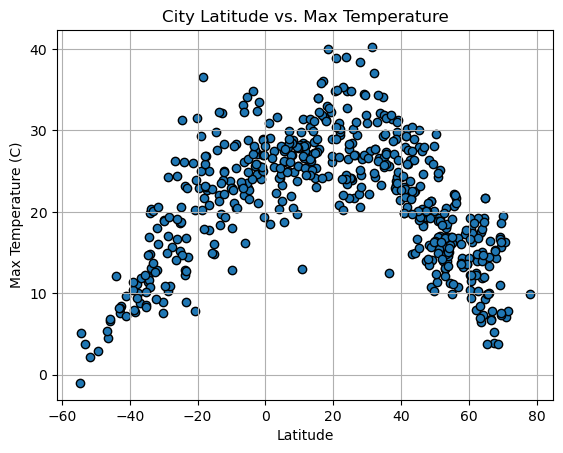

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

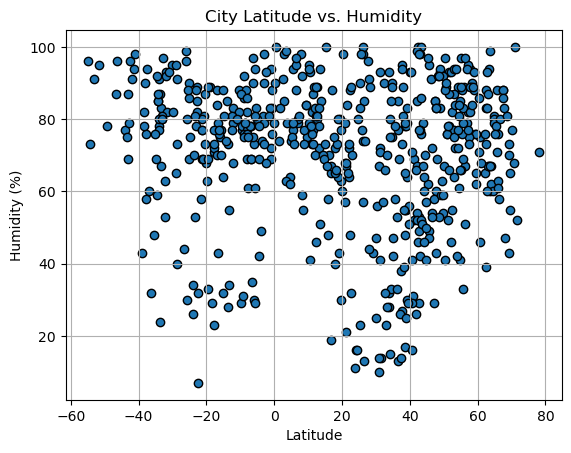

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

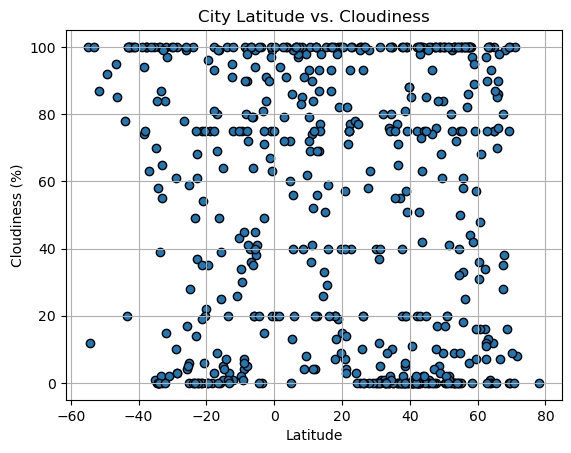

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

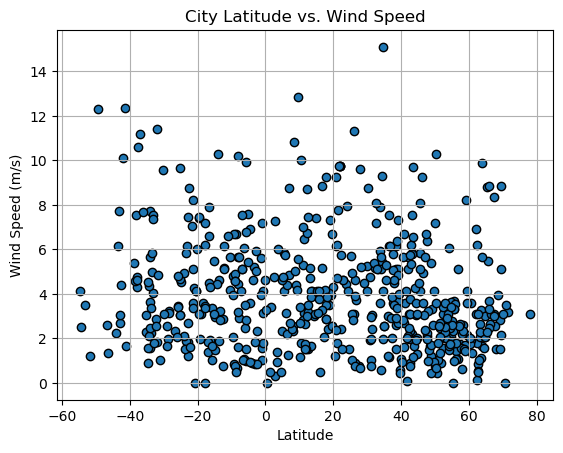

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def linreg(x_name, x_values, y_name, y_values):
    # Find linear regression numbers and equation of regression line
    (slope, intercept, rval, pval, std_err) = linregress(x_values, y_values)
    line_vals = slope * x_values + intercept
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    print(f"The r-value is: {rval**2}")
    
    # Plot scatterplot & line of best fit
    plt.scatter(x_values, y_values)
    plt.plot(x_values, line_vals, "r-")
    
    plt.title(f"{x_name} vs {y_name}")
    plt.xlabel(str(x_name))
    plt.ylabel(str(y_name))
    
    # Equation for line of best fit in lower left of each graph
    ann_xy = (x_values.min(), y_values.min())
    plt.annotate(eq, fontsize = 15, color = "red", xy = ann_xy)
    
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la passe,45.5549,-0.8967,26.13,49,1,5.83,FR,1691615644
2,vilyuysk,63.7553,121.6247,13.41,60,1,3.29,RU,1691615645
3,polyarnyy,69.1989,33.4478,19.08,73,0,2.85,RU,1691615645
5,crane,31.3974,-102.3501,40.54,14,1,3.03,US,1691615648
6,nurlat,54.4277,50.8051,18.77,61,0,1.92,RU,1691615650


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,19.40,75,28,4.53,AU,1691615377
4,tolanaro,-25.0319,46.9987,19.42,90,6,3.03,MG,1691615647
8,waitangi,-43.9535,-176.5597,9.90,77,78,2.24,NZ,1691615646
11,port-aux-francais,-49.3500,70.2167,2.65,78,92,12.29,TF,1691615540
15,new norfolk,-42.7826,147.0587,13.29,79,100,2.69,AU,1691615653


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.48460201404296727


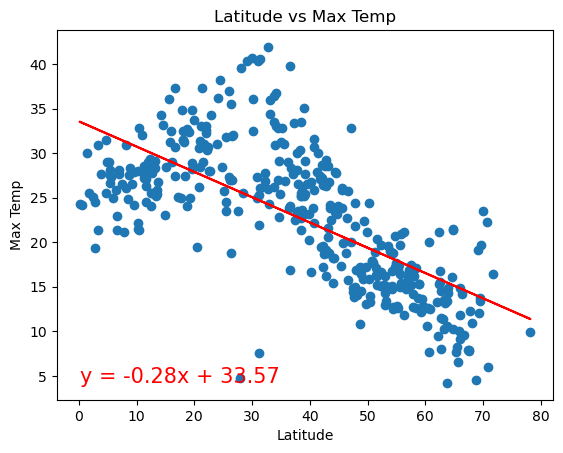

In [51]:
# Linear regression on Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Max Temp", northern_hemi_df["Max Temp"])

The r-value is: 0.6647934768033734


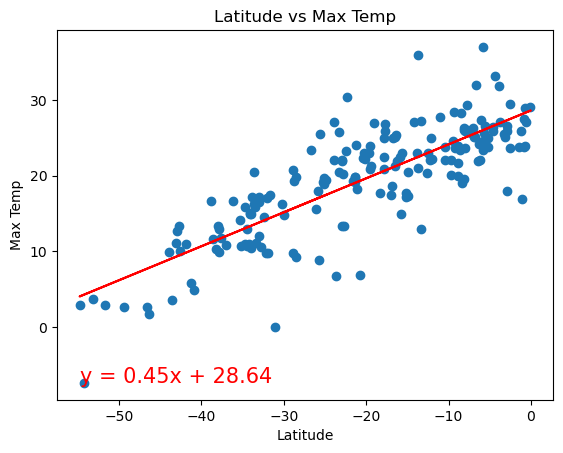

In [52]:
# Linear regression on Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Max Temp", southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** Max temperature gets hotter as you move further from the equator. This is much more evident in the southern hemisphere than the norther hemisphere.
    
### Humidity vs. Latitude Linear Regression Plot

The r-value is: 3.582722986745455e-05


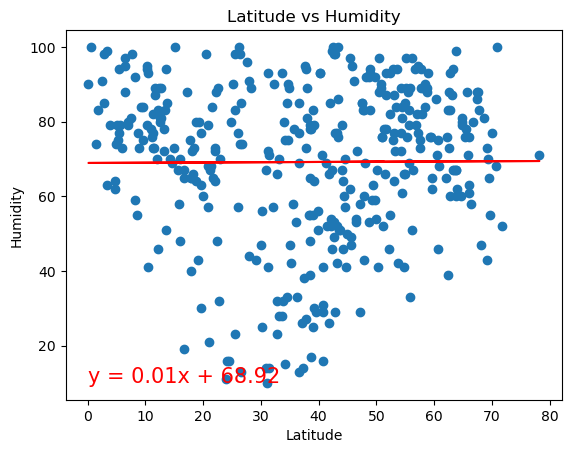

In [53]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Humidity", northern_hemi_df["Humidity"])

The r-value is: 0.012498902891870634


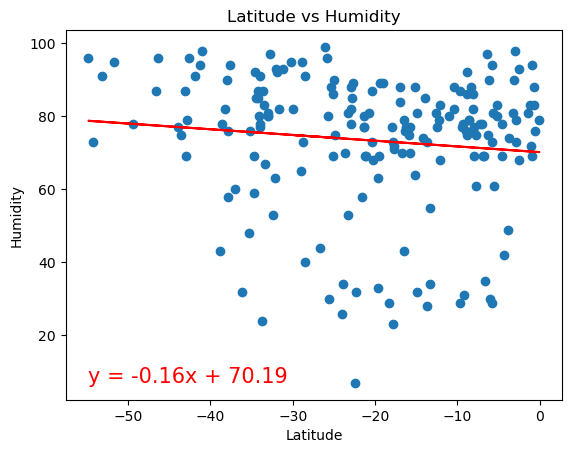

In [54]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Humidity", southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** As evidenced in the r2 values, there isn't a very linear relationship between latitude and humidity. It would be useful to also consider how close each city is to a coastline/large body of water. Since humidity is a percentage and affected by the temperature, it should also be taken with the above graphs of max temperature

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00945766011484159


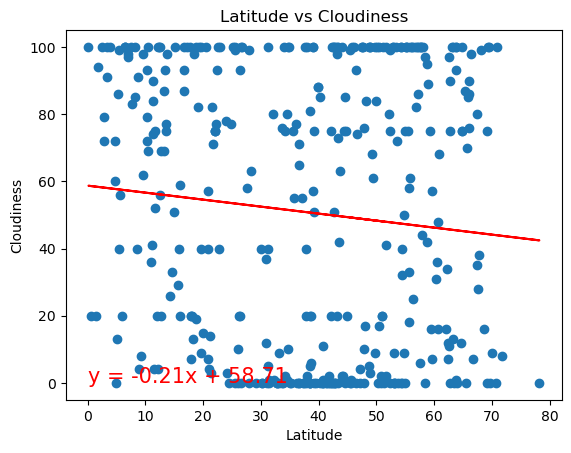

In [55]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Cloudiness", northern_hemi_df["Cloudiness"])

The r-value is: 0.01151544076368469


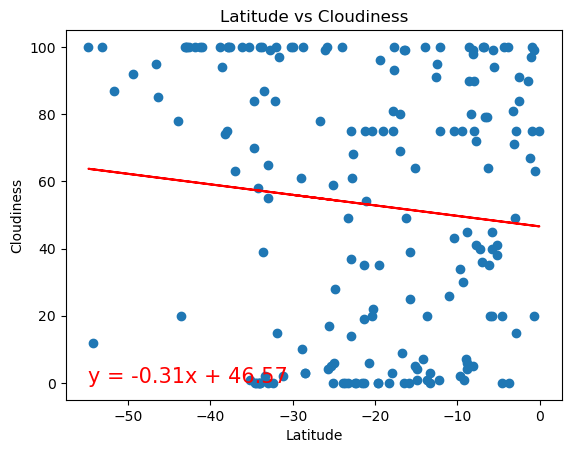

In [56]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Cloudiness", southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Cloudiness does not appear to have a linear relationship with latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04206261774298409


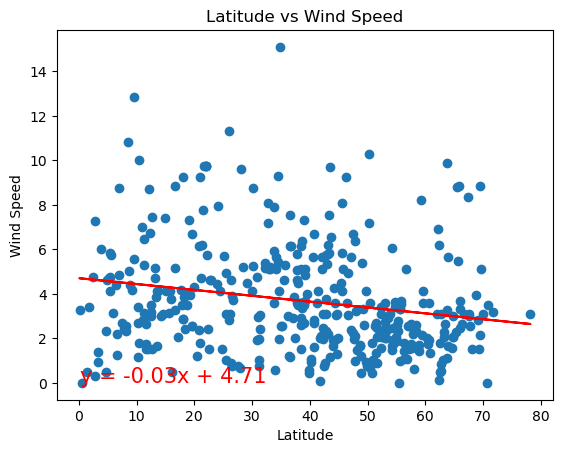

In [57]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Wind Speed", northern_hemi_df["Wind Speed"])

The r-value is: 0.01344173566226993


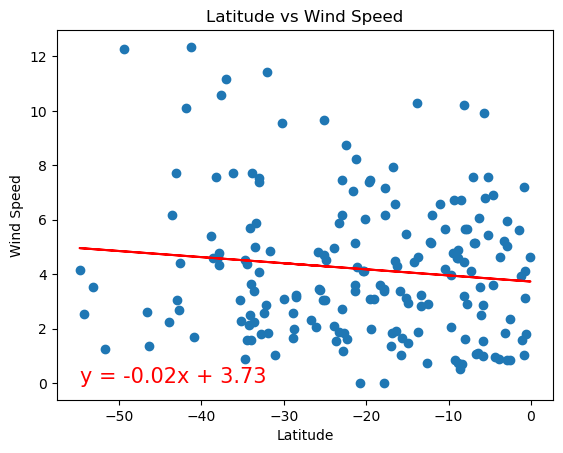

In [58]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Wind Speed", southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Wind speed and latitude don't seem to have a very linear relationship, It nominally seems to decrease as latitude increases, though.